In [2]:
import pandas as pd
import numpy as np
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

df = pd.read_excel("포털검색량_전체기간.xlsx", header = 0, index_col = 0, sheet_name="1년")
df.head(5)

,지점명,일시,평균기온(°C),일강수량(mm),일 최심적설(cm),갈비,곰탕,곱창,국수,꽃게,...,칼국수,파전,모듬전,빈대떡,파전합,패밀리레스토랑,피자,햄버거,회,한정식
지점,,,,,,,,,,,,,,,,,,,,,
108,서울,2022-09-01,24.0,NaN,NaN,2220,1120,4210,1250,18000,...,3660,480,930,440,1850,460,4300,3570,1220,1550
108,서울,2022-09-02,24.7,NaN,NaN,2340,1080,4660,1300,17500,...,4280,870,880,560,2310,500,5020,3510,1350,1630
108,서울,2022-09-03,24.2,NaN,NaN,3110,1280,5300,1890,14800,...,6220,810,890,610,2310,710,7020,4310,1640,2250
108,서울,2022-09-04,22.3,33.8,NaN,3110,1570,5140,2050,14900,...,9680,1480,1240,840,3560,690,7450,3930,1280,2290
108,서울,2022-09-05,19.2,120.0,NaN,2170,1080,4100,1170,12800,...,6760,2560,1730,1140,5430,390,5110,2870,970,1330


### 일일 검색수 상위랭크 일별 차트

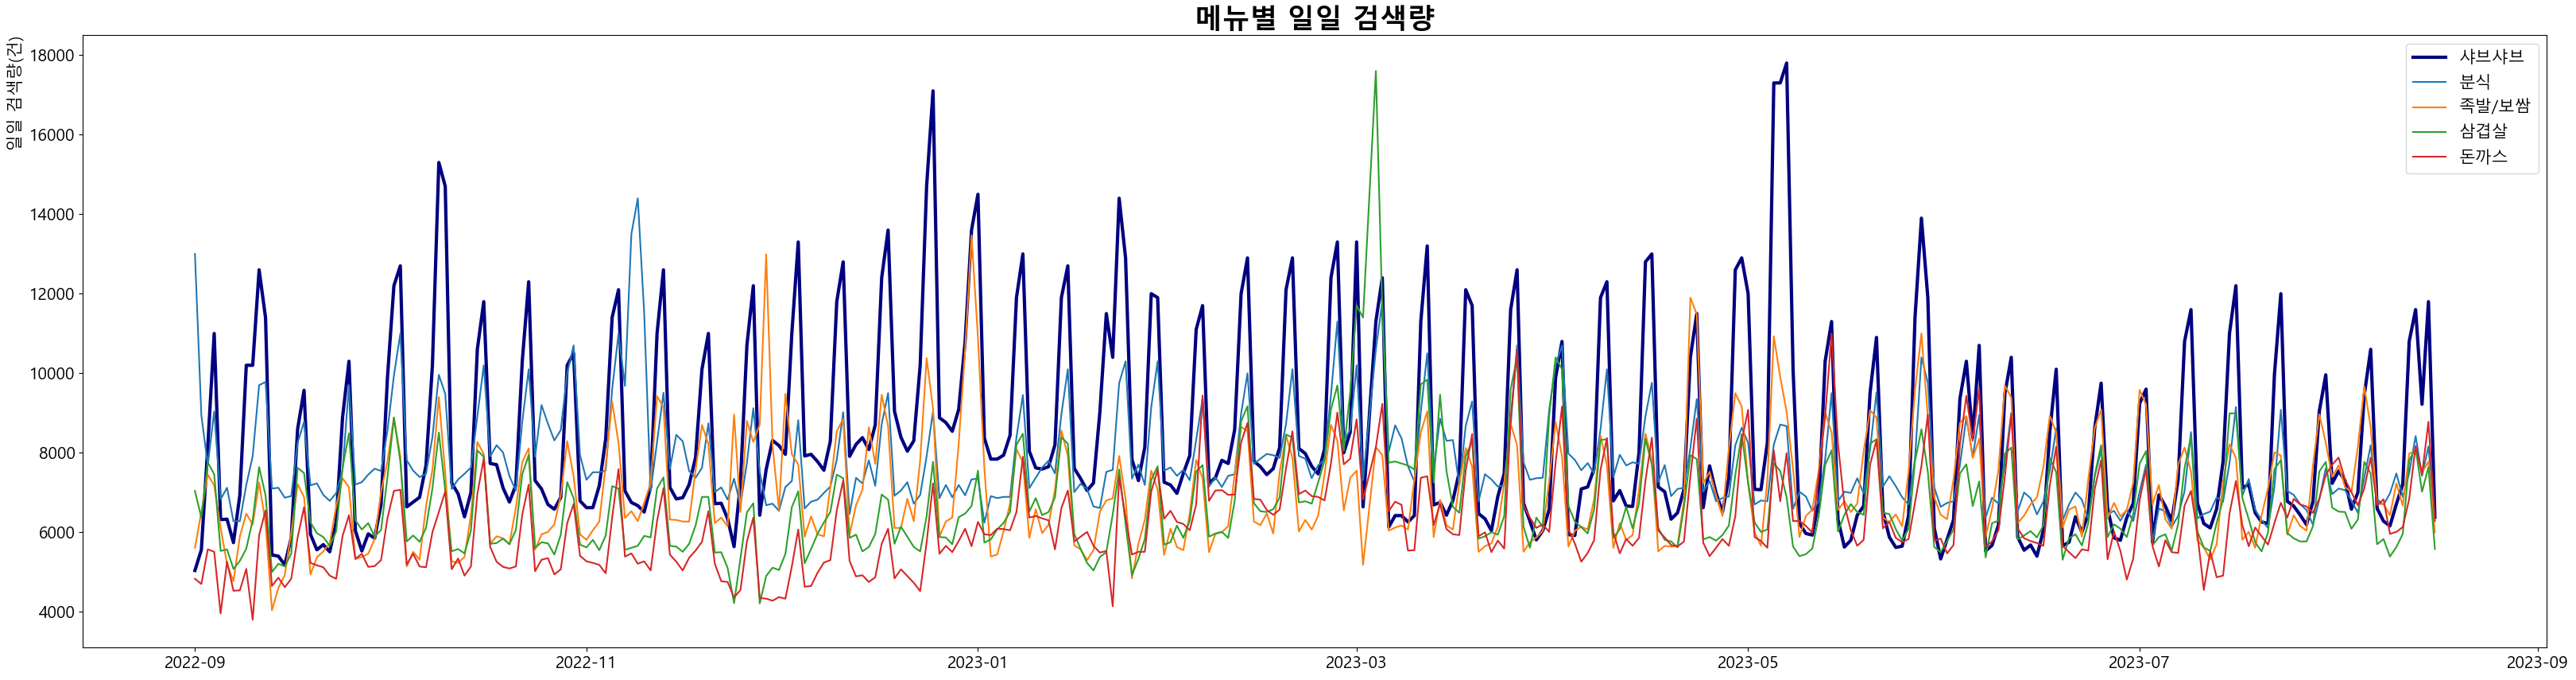

In [3]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic' # 폰트설정
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False 

import matplotlib.pyplot as plt

## 3월 3일 삼겹살이 3만 건이상으로 이상치 -> 3월 3일 데이터 제외 후 차트 생성
condition = df['일시'] == '2023-03-03'
df = df[~condition]

plt.figure(figsize=(40,10))
plt.plot(df["일시"],df["샤브샤브"], color="navy" , linewidth = 3, label = "샤브샤브")
plt.title("메뉴별 일일 검색량", color = "black", fontsize = 25, fontweight = "bold")
# plt.xticks([1,30,60,90,120,150,180,210,240],rotation = 45 )
#plt.xlabel("날짜", color= "black" , loc = "right")
plt.ylabel("일일 검색량(건)", color = "black", loc = "top") 

plt.plot(df["일시"],df["떡볶이"], label = "분식")
plt.plot(df["일시"],df["족발/보쌈"], label = "족발/보쌈")
plt.plot(df["일시"],df["삼겹살"], label = "삼겹살")
plt.plot(df["일시"],df["돈까스"], label = "돈까스")
# plt.plot(df["일시"],df["닭갈비"], label = "닭갈비")
# plt.plot(df["일시"],df["칼국수"], label = "칼국수")
# plt.plot(df["일시"],df["초밥"], label = "초밥")
# plt.plot(df["일시"],df["중국음식"], label = "중국음식")

plt.legend(loc = "upper right")

### 매월 1일만 나타내기

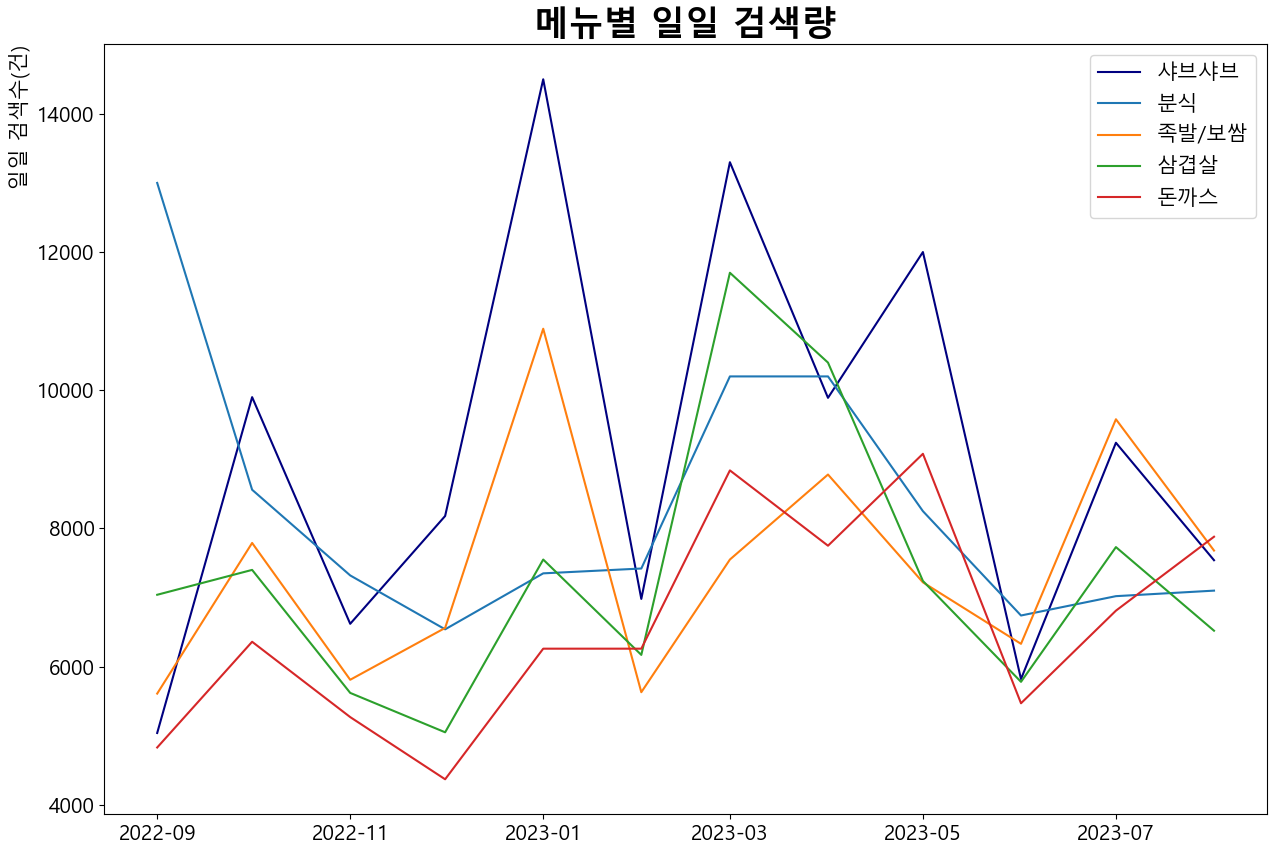

In [4]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic' # 폰트설정
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False 

import matplotlib.pyplot as plt

# 1일의 데이터만 추출
df_first_days = df[df["일시"].dt.day == 1]
df_first_days

plt.figure(figsize=(15,10))
plt.plot(df_first_days["일시"],df_first_days["샤브샤브"], color="navy", label = "샤브샤브")
plt.title("메뉴별 일일 검색량", color = "black", fontsize = 25, fontweight = "bold")
#plt.xticks([1,30,60,90,120,150,180,210,240],rotation = 45 )
#plt.xlabel("날짜", color= "black" , loc = "right")
plt.ylabel("일일 검색수(건)", color = "black", loc = "top")
plt.plot(df_first_days["일시"],df_first_days["떡볶이"], label = "분식")
plt.plot(df_first_days["일시"],df_first_days["족발/보쌈"], label = "족발/보쌈")
plt.plot(df_first_days["일시"],df_first_days["삼겹살"], label = "삼겹살")
plt.plot(df_first_days["일시"],df_first_days["돈까스"], label = "돈까스")
# plt.plot(df["일시"],df["닭갈비"], label = "닭갈비")
# plt.plot(df["일시"],df["칼국수"], label = "칼국수")
# plt.plot(df["일시"],df["초밥"], label = "초밥")
# plt.plot(df["일시"],df["중국음식"], label = "중국음식")
plt.legend(loc = "upper right")

### 일평균 검색량 순위 차트

In [5]:
average_df = pd.read_excel("포털검색량_전체기간.xlsx", header = 0,  sheet_name="전체기간")
average_df.head(10)

,음식,일평균 검색수
0,샤브샤브,8472.028571
1,떡볶이,7812.228571
2,족발/보쌈,7069.857143
3,삼겹살,6751.257143
4,돈까스,6225.200000
5,닭갈비,6176.400000
6,칼국수,5963.085714
7,짜장면/짬뽕,5369.457143
8,초밥,5293.371429
9,족발,5170.800000


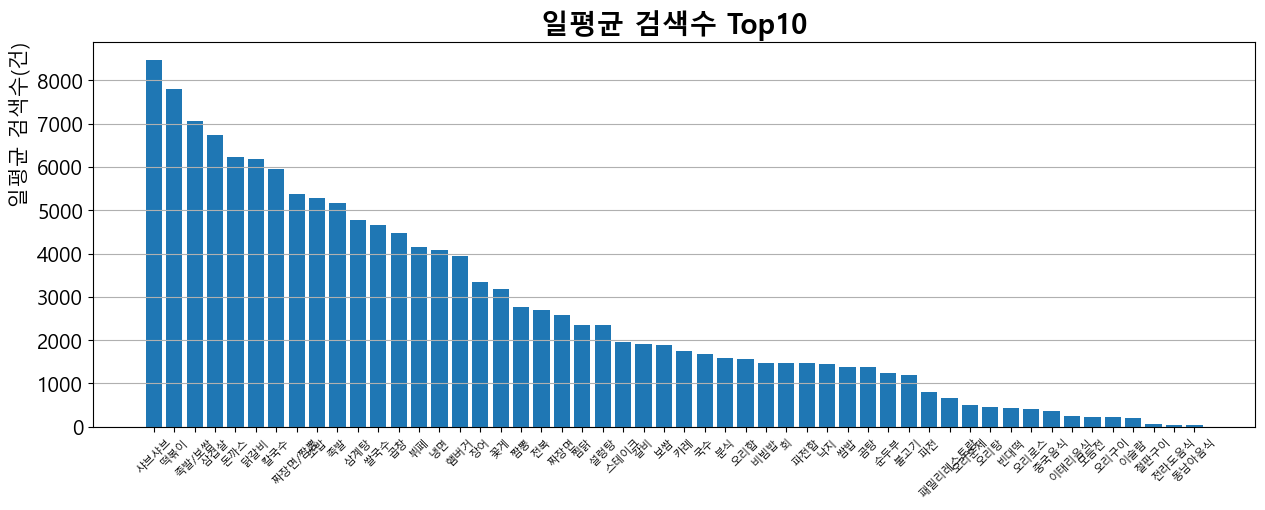

In [6]:
# 모든 메뉴 가져오기

plt.figure(figsize=(15,5))
plt.bar(average_df["음식"],average_df["일평균 검색수"])
plt.title("일평균 검색수 Top10", color = "black", fontsize = 20, fontweight = "bold")
plt.xticks(fontsize=8,rotation = 45 )
plt.ylabel("일평균 검색수(건)", color = "black", loc = "top")
plt.grid(axis='y')

## 날씨, 계절에 따른 음식 검색량 추이

### 비오는날

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

new_df = pd.read_excel("포털검색량_전체기간.xlsx", header = 0, index_col = 0, sheet_name="1년")
new_df['일강수량(mm)'].fillna(0, inplace=True)
new_df['일 최심적설(cm)'].fillna(0, inplace=True)

new_df

,지점명,일시,평균기온(°C),일강수량(mm),일 최심적설(cm),갈비,곰탕,곱창,국수,꽃게,...,칼국수,파전,모듬전,빈대떡,파전합,패밀리레스토랑,피자,햄버거,회,한정식
지점,,,,,,,,,,,,,,,,,,,,,
108,서울,2022-09-01,24.0,0.0,0.0,2220,1120,4210,1250,18000,...,3660,480,930,440,1850,460,4300,3570,1220,1550
108,서울,2022-09-02,24.7,0.0,0.0,2340,1080,4660,1300,17500,...,4280,870,880,560,2310,500,5020,3510,1350,1630
108,서울,2022-09-03,24.2,0.0,0.0,3110,1280,5300,1890,14800,...,6220,810,890,610,2310,710,7020,4310,1640,2250
108,서울,2022-09-04,22.3,33.8,0.0,3110,1570,5140,2050,14900,...,9680,1480,1240,840,3560,690,7450,3930,1280,2290
108,서울,2022-09-05,19.2,120.0,0.0,2170,1080,4100,1170,12800,...,6760,2560,1730,1140,5430,390,5110,2870,970,1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,서울,2023-08-12,23.3,1.5,0.0,2390,1390,4400,2060,1330,...,6600,560,140,440,1140,760,7880,4840,1600,2510
108,서울,2023-08-13,27.0,0.0,0.0,2780,1730,4530,2570,1450,...,8040,470,120,350,940,920,8950,4960,1490,2850
108,서울,2023-08-14,28.1,0.0,0.0,2170,1350,4620,2120,1470,...,5600,510,140,300,950,740,6700,4520,1620,2310


#### 파전/모듬전/빈대떡

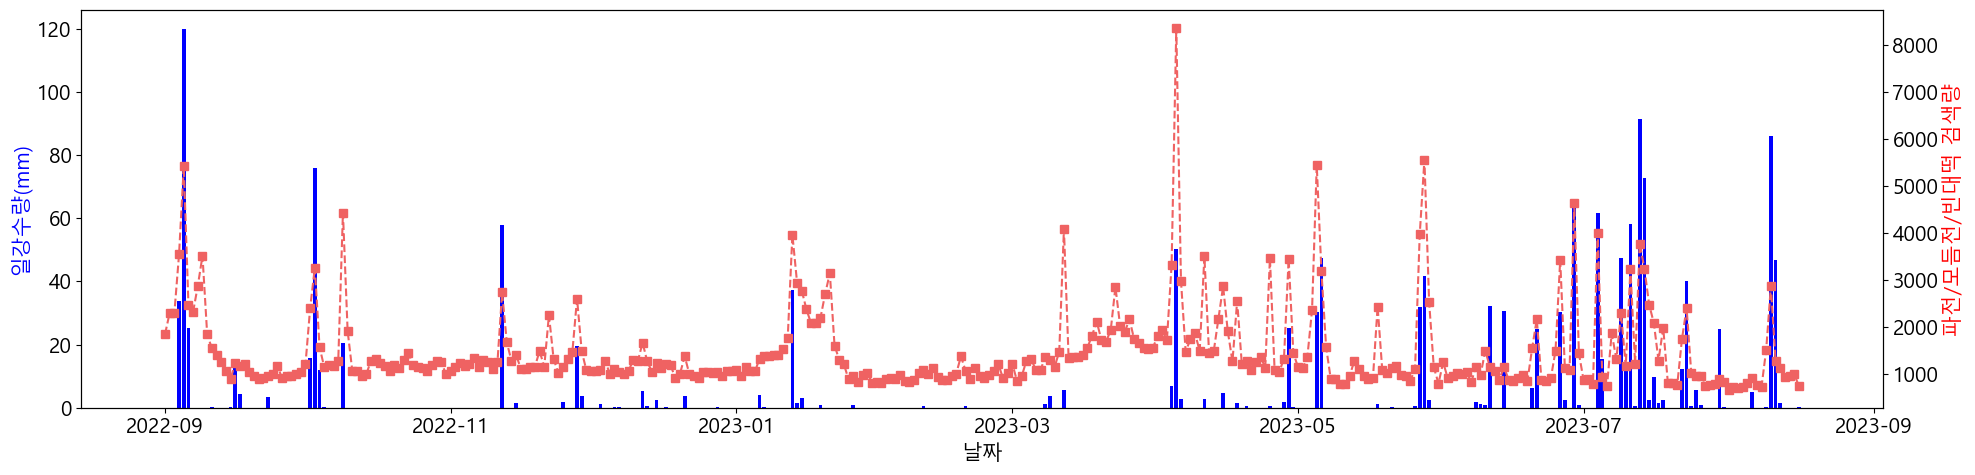

In [8]:
# 파전/모듬전/빈대떡

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(20, 5))  # 첫 번째 Y 축을 갖는 그래프

# 첫 번째 Y 축에 강수량 막대 그래프 그리기
ax1.bar(new_df['일시'], new_df['일강수량(mm)'], color='b', label='일강수량(mm)')
ax1.set_xlabel('날짜')
ax1.set_ylabel('일강수량(mm)', color='b')

# 두 번째 Y 축을 생성
ax2 = ax1.twinx()

# 두 번째 Y 축에 검색량 그리기
ax2.plot(new_df['일시'], new_df['파전합'], marker='s', linestyle='--', color='#EF6262')
ax2.set_ylabel('파전/모듬전/빈대떡 검색량', color='r')

# x 축에 날짜 형식 적용
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 그래프 표시
plt.tight_layout()
plt.show()


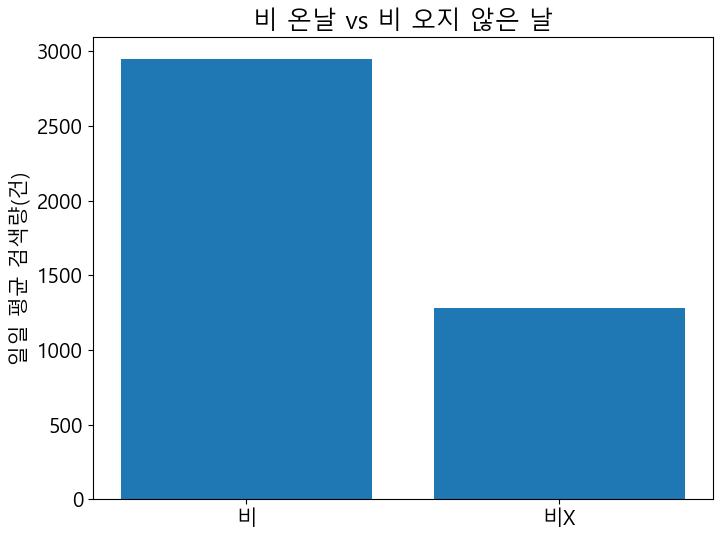

In [9]:
# 비온 날 vs 비 오지 않는 날 일 평균 검색량 비교
new_df['비구분'] = np.where(new_df['일강수량(mm)'] < 5, '비X', '비')

mean_values = new_df.groupby('비구분')['파전합'].mean()

# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('비 온날 vs 비 오지 않은 날')

# 그래프를 화면에 표시
plt.show()

#### 삼계탕

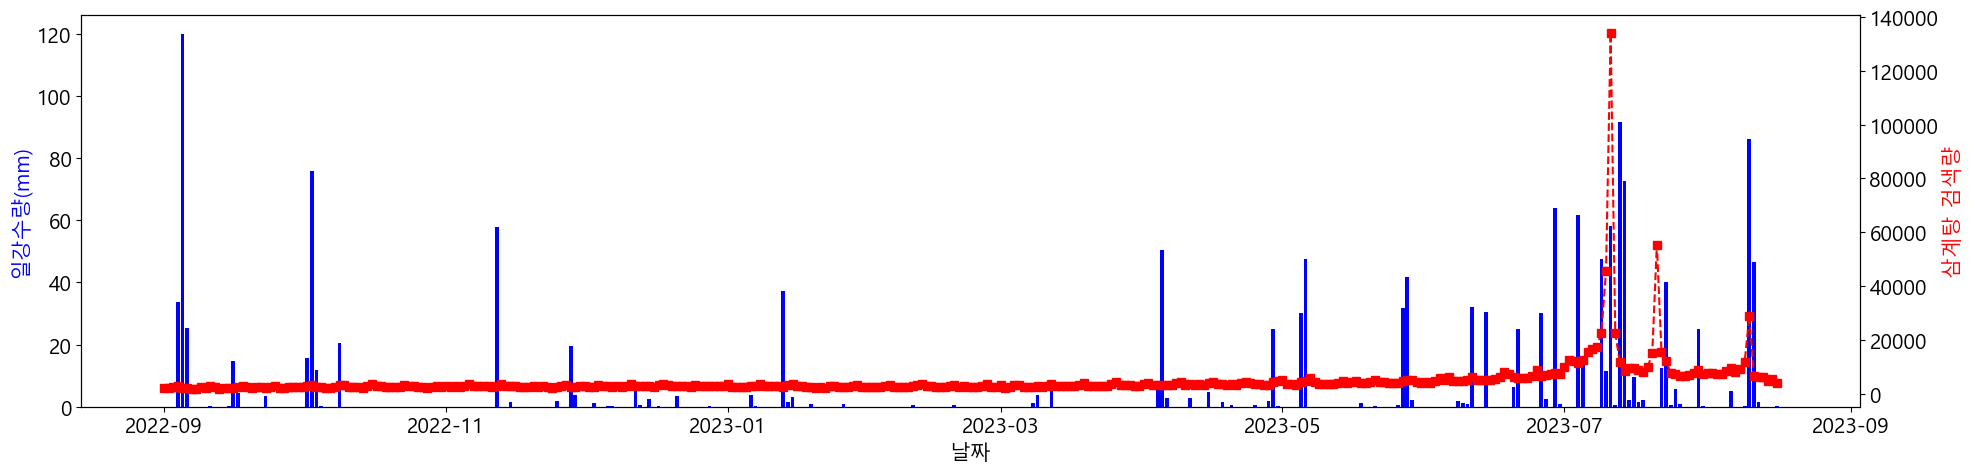

In [10]:
# 삼계탕

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(20, 5))  # 첫 번째 Y 축을 갖는 그래프

# 첫 번째 Y 축에 강수량 막대 그래프 그리기
ax1.bar(new_df['일시'], new_df['일강수량(mm)'], color='b', label='일강수량(mm)')
ax1.set_xlabel('날짜')
ax1.set_ylabel('일강수량(mm)', color='b')

# 두 번째 Y 축을 생성
ax2 = ax1.twinx()

# 두 번째 Y 축에 검색량 그리기
ax2.plot(new_df['일시'], new_df['삼계탕'], marker='s', linestyle='--', color='r')
ax2.set_ylabel('삼계탕 검색량', color='r')

# x 축에 날짜 형식 적용
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# x 축 레이블 각도 조정 (선택적)
plt.xticks(rotation=45)


# 그래프 표시
plt.tight_layout()
plt.show()


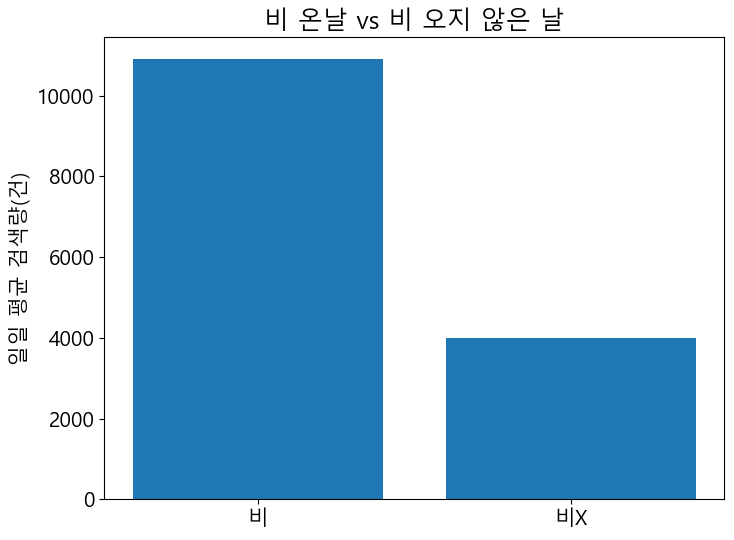

In [11]:
# 비온 날 vs 비 오지 않는 날 일 평균 검색량 비교

mean_values = new_df.groupby('비구분')['삼계탕'].mean()

# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('비 온날 vs 비 오지 않은 날')

# 그래프를 화면에 표시
plt.show()

#### 철판구이

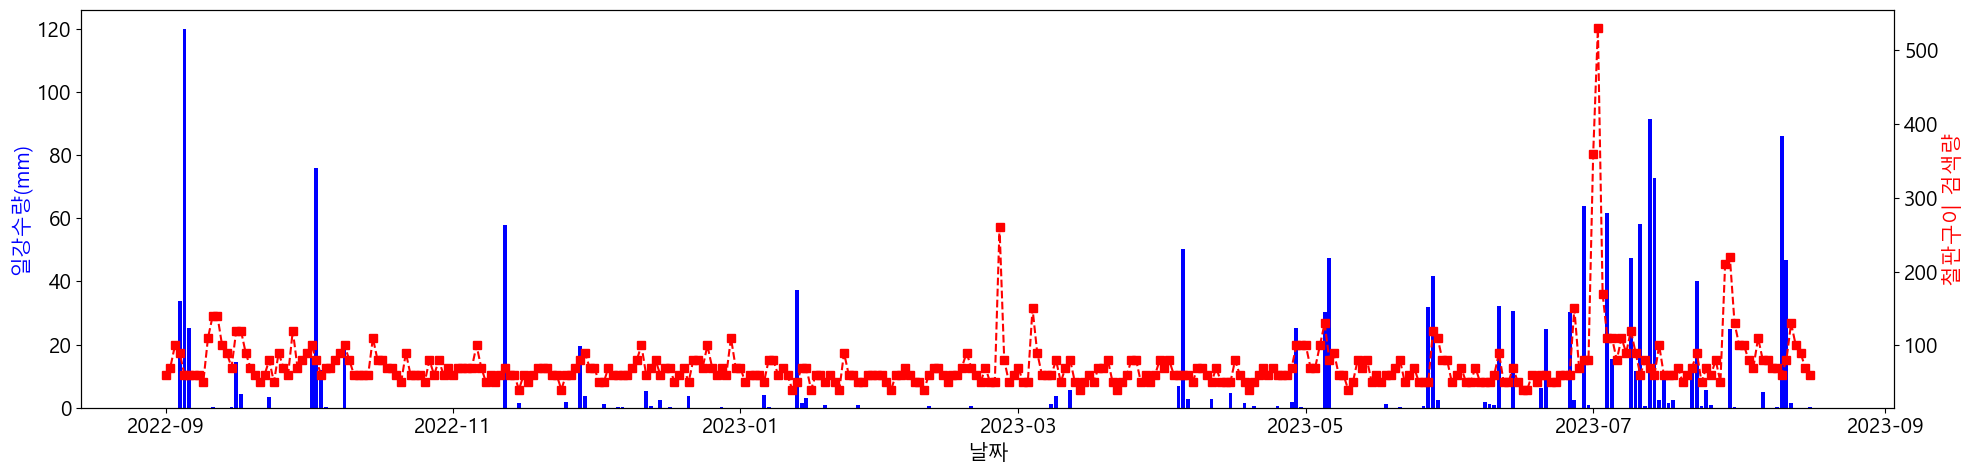

In [11]:
# 철판구이

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(20, 5))  # 첫 번째 Y 축을 갖는 그래프

# 첫 번째 Y 축에 강수량 막대 그래프 그리기
ax1.bar(new_df['일시'], new_df['일강수량(mm)'], color='b', label='일강수량(mm)')
ax1.set_xlabel('날짜')
ax1.set_ylabel('일강수량(mm)', color='b')

# 두 번째 Y 축을 생성
ax2 = ax1.twinx()

# 두 번째 Y 축에 검색량 그리기
ax2.plot(new_df['일시'], new_df['철판구이'], marker='s', linestyle='--', color='r')
ax2.set_ylabel('철판구이 검색량', color='r')

# x 축에 날짜 형식 적용
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# x 축 레이블 각도 조정 (선택적)
plt.xticks(rotation=45)


# 그래프 표시
plt.tight_layout()
plt.show()

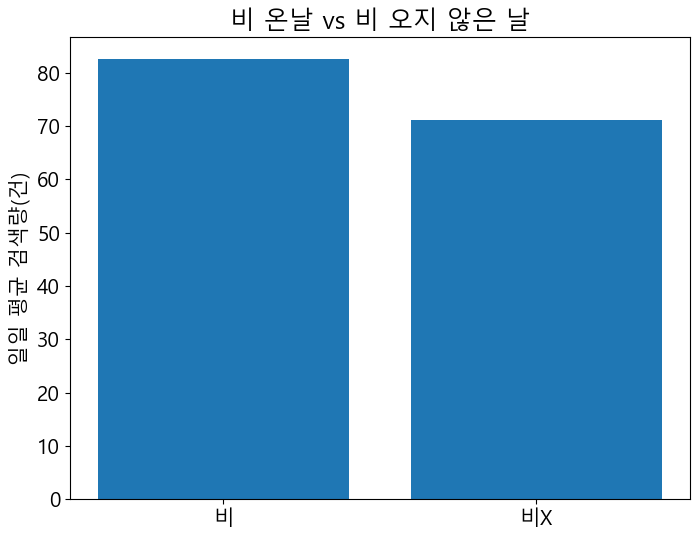

In [12]:
# 비온 날 vs 비 오지 않는 날 일 평균 검색량 비교

mean_values = new_df.groupby('비구분')['철판구이'].mean()

# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('비 온날 vs 비 오지 않은 날')

# 그래프를 화면에 표시
plt.show()

#### 짜장면/짬뽕

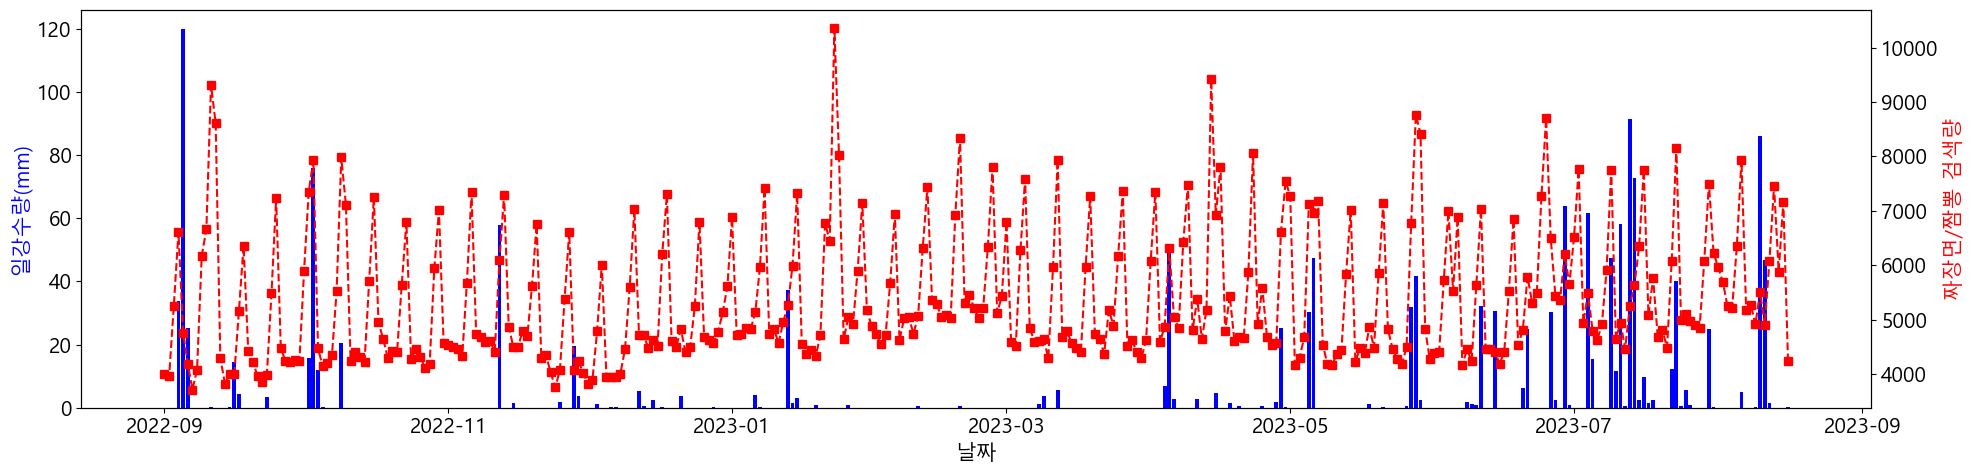

In [13]:
# 짜장면/짬뽕

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(20, 5))  # 첫 번째 Y 축을 갖는 그래프

# 첫 번째 Y 축에 강수량 막대 그래프 그리기
ax1.bar(new_df['일시'], new_df['일강수량(mm)'], color='b', label='일강수량(mm)')
ax1.set_xlabel('날짜')
ax1.set_ylabel('일강수량(mm)', color='b')

# 두 번째 Y 축을 생성
ax2 = ax1.twinx()

# 두 번째 Y 축에 검색량 그리기
ax2.plot(new_df['일시'], new_df['짜장면/짬뽕'], marker='s', linestyle='--', color='r')
ax2.set_ylabel('짜장면/짬뽕 검색량', color='r')

# x 축에 날짜 형식 적용
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# x 축 레이블 각도 조정 (선택적)
plt.xticks(rotation=45)


# 그래프 표시
plt.tight_layout()
plt.show()

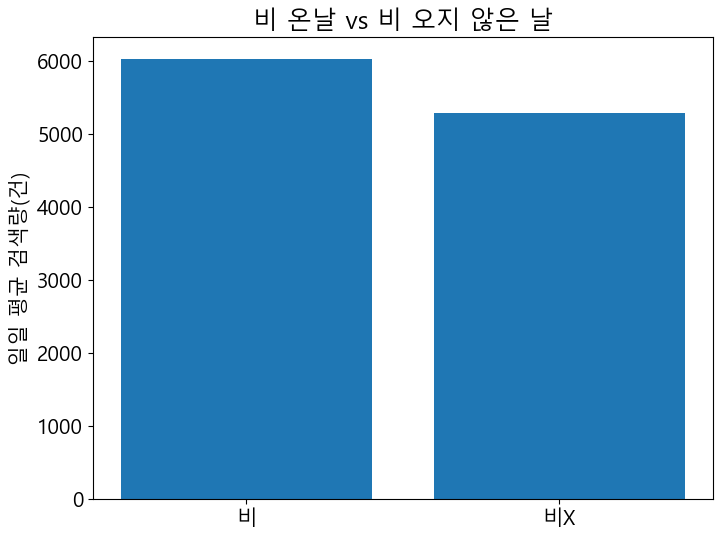

In [14]:
# 비온 날 vs 비 오지 않는 날 일 평균 검색량 비교

mean_values = new_df.groupby('비구분')['짜장면/짬뽕'].mean()

# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('비 온날 vs 비 오지 않은 날')

# 그래프를 화면에 표시
plt.show()

### 눈오는날

#### 삼겹살

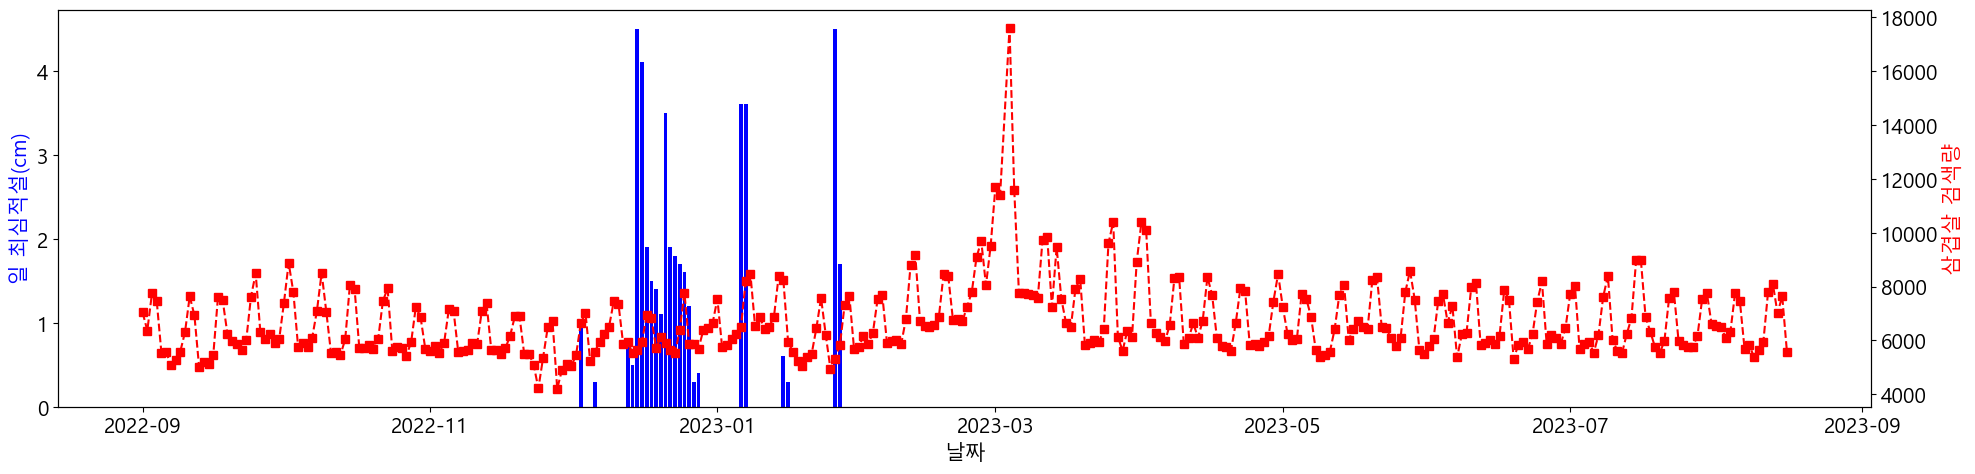

In [15]:
#눈오는날 검색 증가율이 높았던 음식
# 삼겹살
## 3월 3일 삼겹살이 3만 건이상으로 이상치 -> 3월 3일 데이터 제외 후 차트 생성
condition = new_df['일시'] == '2023-03-03'
new_df_33 = new_df[~condition]

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(20, 5))  # 첫 번째 Y 축을 갖는 그래프

# 첫 번째 Y 축에 강수량 막대 그래프 그리기
ax1.bar(new_df_33['일시'], new_df_33['일 최심적설(cm)'], color='b')
ax1.set_xlabel('날짜')
ax1.set_ylabel('일 최심적설(cm)', color='b')

# 두 번째 Y 축을 생성
ax2 = ax1.twinx()

# 두 번째 Y 축에 검색량 그리기
ax2.plot(new_df_33['일시'], new_df_33['삼겹살'], marker='s', linestyle='--', color='r')
ax2.set_ylabel('삼겹살 검색량', color='r')

# x 축에 날짜 형식 적용
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# x 축 레이블 각도 조정 (선택적)
plt.xticks(rotation=45)


# 그래프 표시
plt.tight_layout()
plt.show()

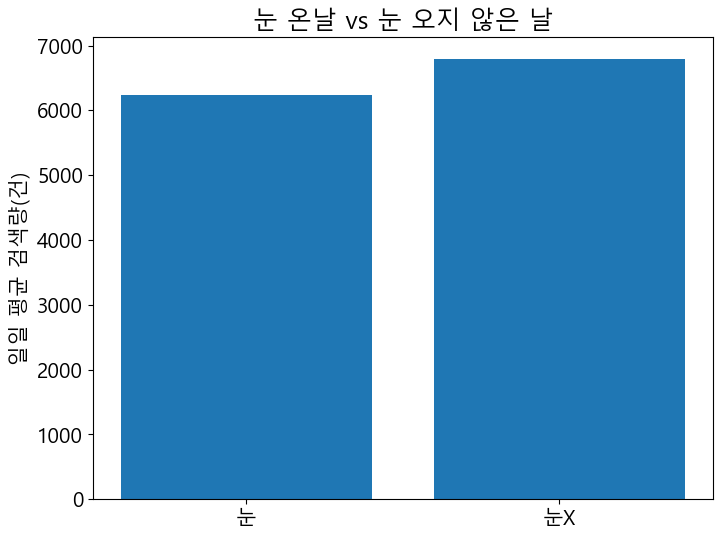

In [16]:
# 눈온 날 vs 눈 오지 않는 날 일 평균 검색량 비교
new_df['눈구분'] = np.where(new_df['일 최심적설(cm)'] <= 0, '눈X', '눈')


mean_values = new_df.groupby('눈구분')['삼겹살'].mean()

# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('눈 온날 vs 눈 오지 않은 날')

# 그래프를 화면에 표시
plt.show()

#### 이슬람 음식

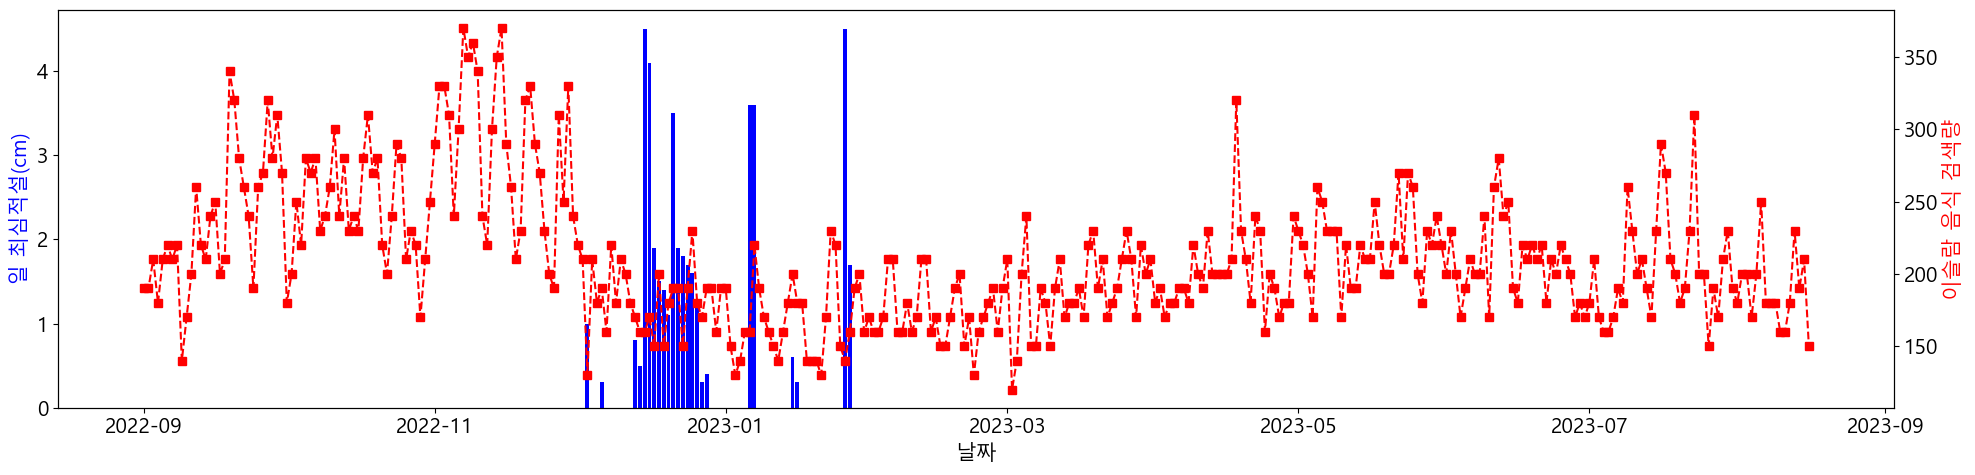

In [17]:
# 이슬람 음식

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(20, 5))  # 첫 번째 Y 축을 갖는 그래프

# 첫 번째 Y 축에 강수량 막대 그래프 그리기
ax1.bar(new_df['일시'], new_df['일 최심적설(cm)'], color='b')
ax1.set_xlabel('날짜')
ax1.set_ylabel('일 최심적설(cm)', color='b')

# 두 번째 Y 축을 생성
ax2 = ax1.twinx()

# 두 번째 Y 축에 검색량 그리기
ax2.plot(new_df['일시'], new_df['이슬람'], marker='s', linestyle='--', color='r')
ax2.set_ylabel('이슬람 음식 검색량', color='r')

# x 축에 날짜 형식 적용
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# x 축 레이블 각도 조정 (선택적)
plt.xticks(rotation=45)


# 그래프 표시
plt.tight_layout()
plt.show()

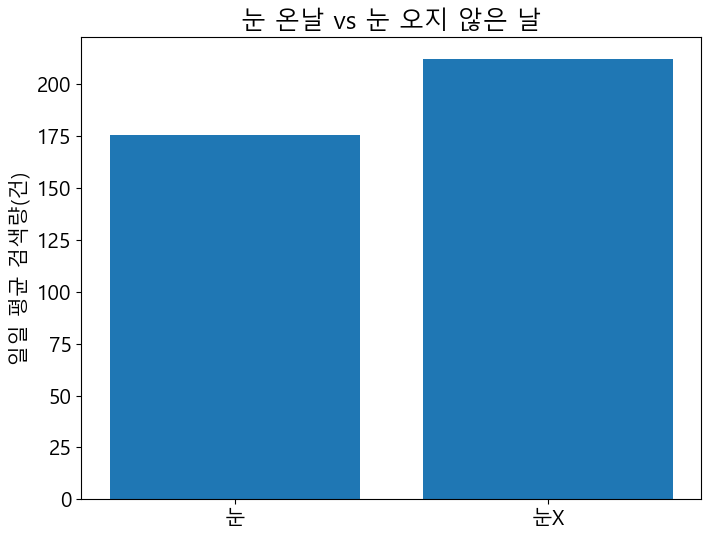

In [18]:
# 눈온 날 vs 눈 오지 않는 날 일 평균 검색량 비교
new_df['눈구분'] = np.where(new_df['일 최심적설(cm)'] <= 0, '눈X', '눈')


mean_values = new_df.groupby('눈구분')['이슬람'].mean()

# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('눈 온날 vs 눈 오지 않은 날')

# 그래프를 화면에 표시
plt.show()

#### 이태리음식

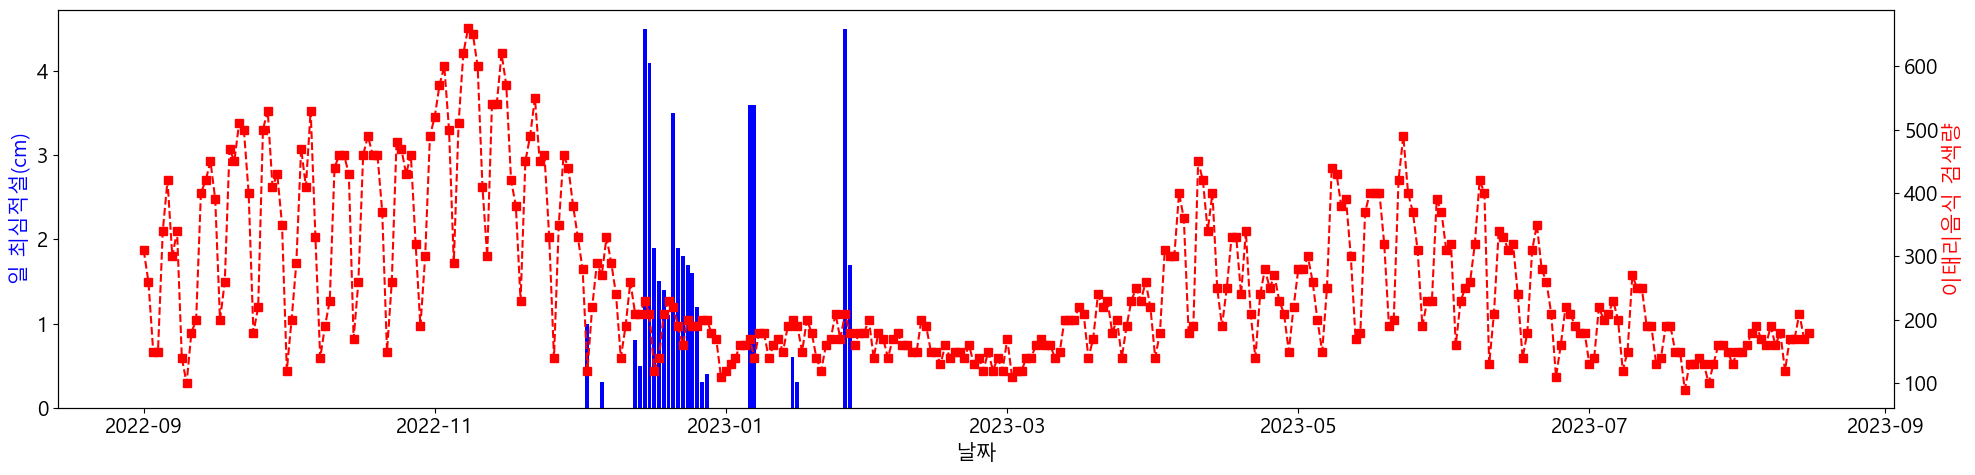

In [19]:
# 이태리음식

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(20, 5))  # 첫 번째 Y 축을 갖는 그래프

# 첫 번째 Y 축에 강수량 막대 그래프 그리기
ax1.bar(new_df['일시'], new_df['일 최심적설(cm)'], color='b')
ax1.set_xlabel('날짜')
ax1.set_ylabel('일 최심적설(cm)', color='b')

# 두 번째 Y 축을 생성
ax2 = ax1.twinx()

# 두 번째 Y 축에 검색량 그리기
ax2.plot(new_df['일시'], new_df['이태리음식'], marker='s', linestyle='--', color='r')
ax2.set_ylabel('이태리음식 검색량', color='r')

# x 축에 날짜 형식 적용
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# x 축 레이블 각도 조정 (선택적)
plt.xticks(rotation=45)


# 그래프 표시
plt.tight_layout()
plt.show()

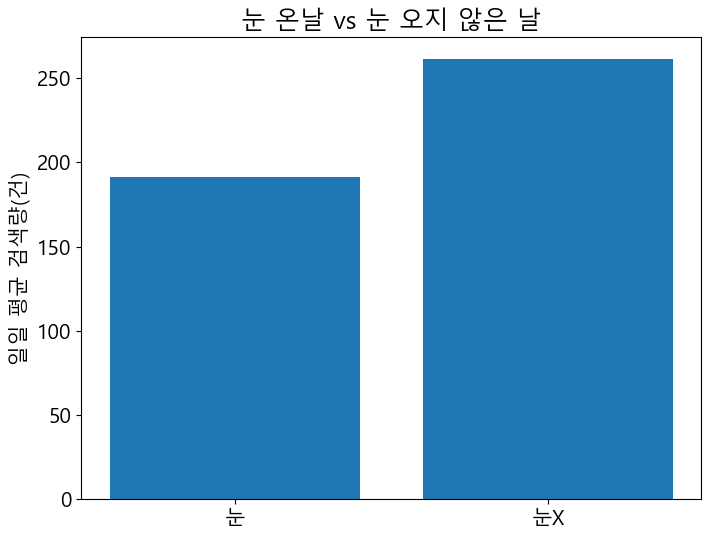

In [20]:
# 눈온 날 vs 눈 오지 않는 날 일 평균 검색량 비교
new_df['눈구분'] = np.where(new_df['일 최심적설(cm)'] <= 0, '눈X', '눈')


mean_values = new_df.groupby('눈구분')['이태리음식'].mean()

# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('눈 온날 vs 눈 오지 않은 날')

# 그래프를 화면에 표시
plt.show()

### 봄

In [21]:
# '일시' 컬럼을 날짜형식으로 변환
new_df['일시'] = pd.to_datetime(new_df['일시'])

# 계절을 나타내는 함수 작성
def 계절구분(row):
    if 3 <= row.month <= 5:
        return '봄'
    elif 6 <= row.month <= 8:
        return '여름'
    elif 9 <= row.month <= 11:
        return '가을'
    else:
        return '겨울'

# '계절구분' 컬럼에 함수를 적용하여 계절 정보 저장
new_df['계절구분'] = new_df['일시'].apply(계절구분)

order = ['봄', '여름', '가을', '겨울']
new_df['계절구분'] = pd.Categorical(new_df['계절구분'], categories=order, ordered=True)

# 데이터프레임을 원하는 순서로 정렬
new_df = new_df.sort_values(by='계절구분')

#### 한정식

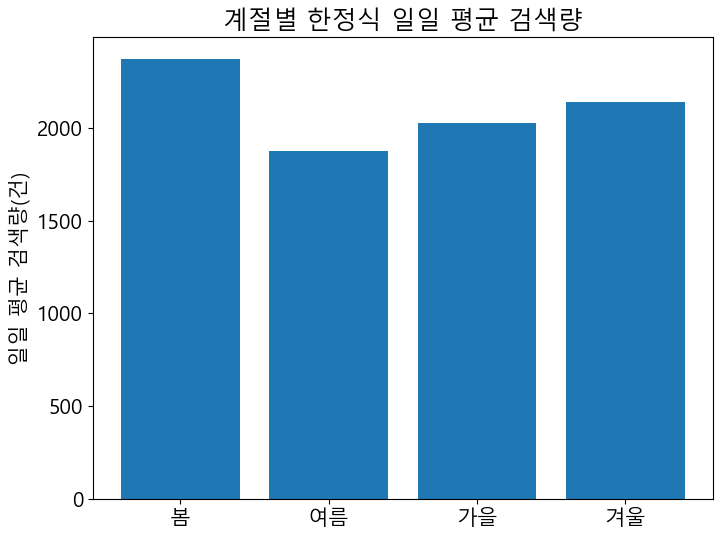

In [22]:
# 한정식

mean_values = new_df.groupby('계절구분')['한정식'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 한정식 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 철판구이

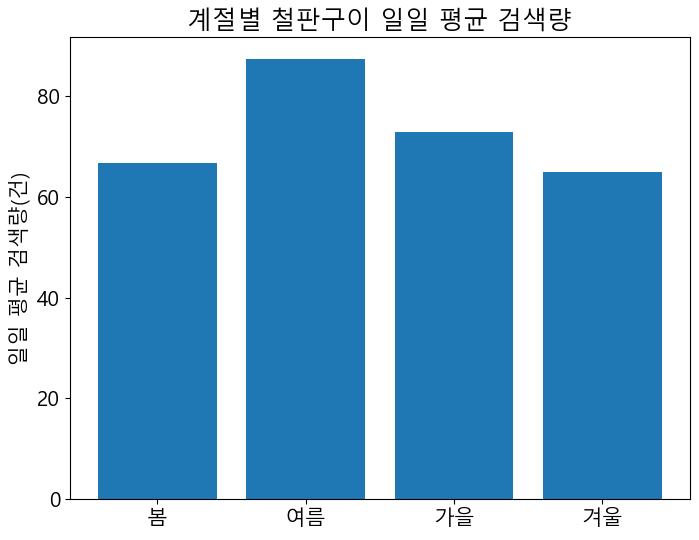

In [23]:
# 철판구이

mean_values = new_df.groupby('계절구분')['철판구이'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 철판구이 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 낙지

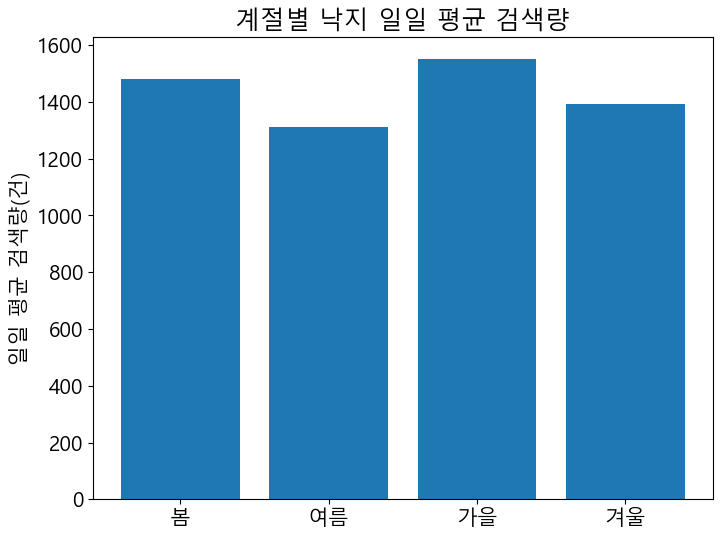

In [24]:
# 낙지

mean_values = new_df.groupby('계절구분')['낙지'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 낙지 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 오리

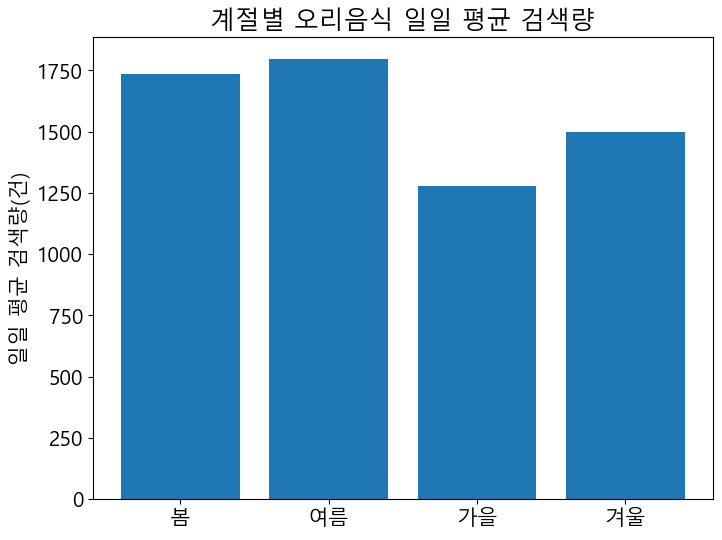

In [25]:
mean_values = new_df.groupby('계절구분')['오리합'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 오리음식 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

### 봄 그래프 합치기

Text(0.5, 1.0, '계절별 불고기 일일 평균 검색량')

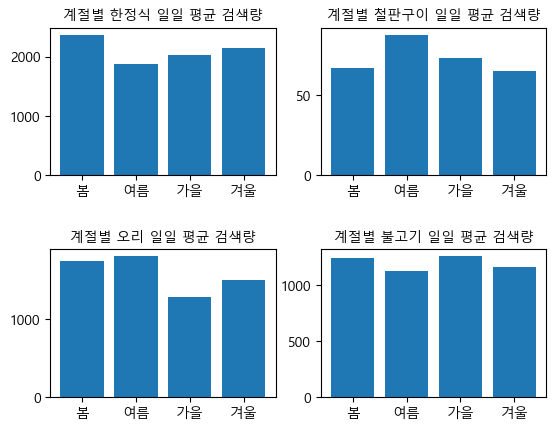

In [26]:
plt.subplots_adjust(hspace = 0.5)

plt.subplot(2,2,1)
mean_values = new_df.groupby('계절구분')['한정식'].mean()

# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 한정식 일일 평균 검색량', fontsize=10)

plt.subplot(2,2,2)
mean_values = new_df.groupby('계절구분')['철판구이'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 철판구이 일일 평균 검색량', fontsize=10)


plt.subplot(2,2,3)
mean_values = new_df.groupby('계절구분')['오리합'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 오리 일일 평균 검색량', fontsize=10)


plt.subplot(2,2,4)
mean_values = new_df.groupby('계절구분')['불고기'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.title('계절별 불고기 일일 평균 검색량', fontsize=10)



### 여름

#### 햄버거

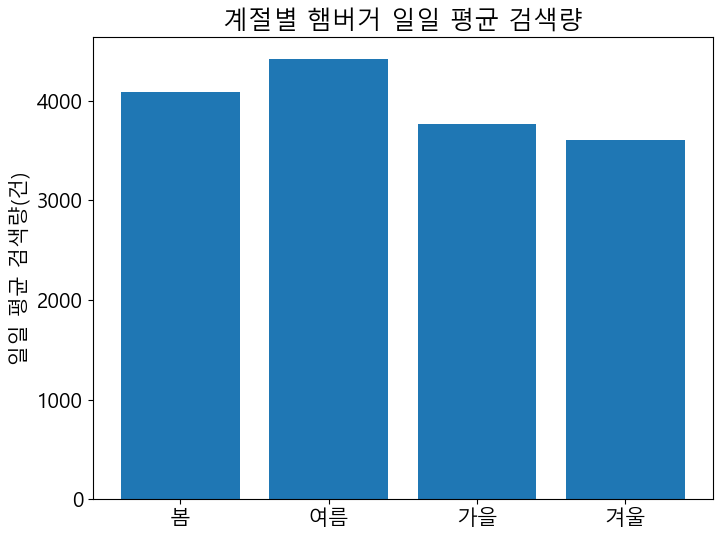

In [27]:
# 햄버거

mean_values = new_df.groupby('계절구분')['햄버거'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 햄버거 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 삼계탕

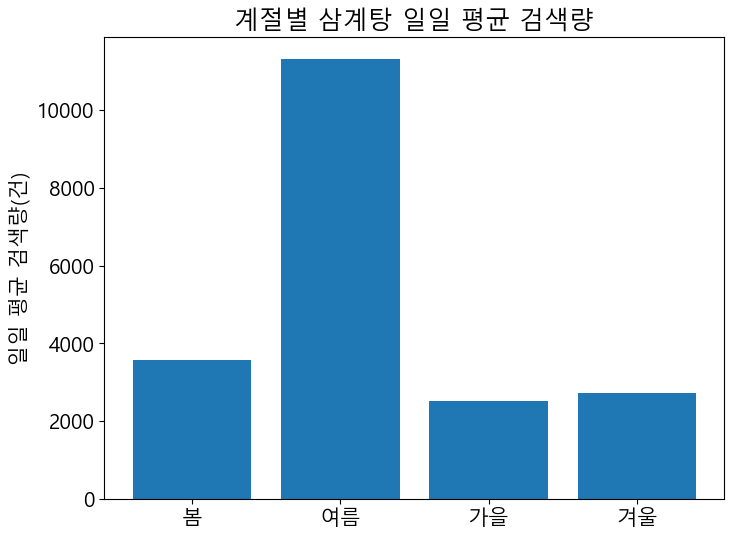

In [28]:
mean_values = new_df.groupby('계절구분')['삼계탕'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 삼계탕 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 냉면

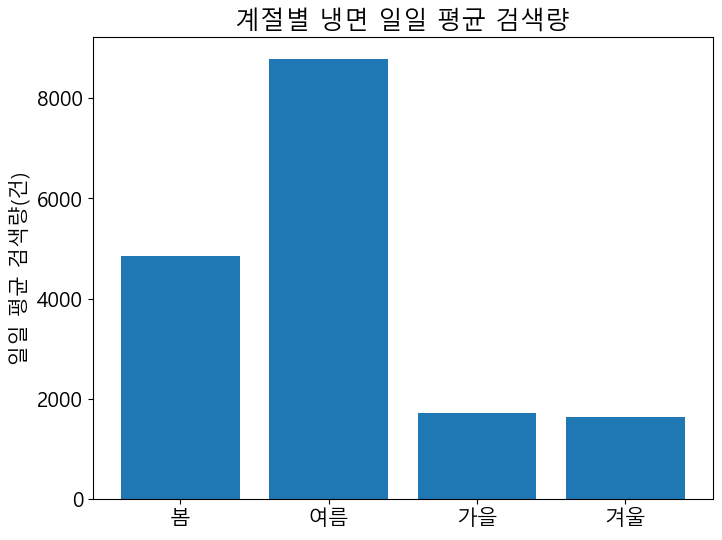

In [29]:
mean_values = new_df.groupby('계절구분')['냉면'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 냉면 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 카레

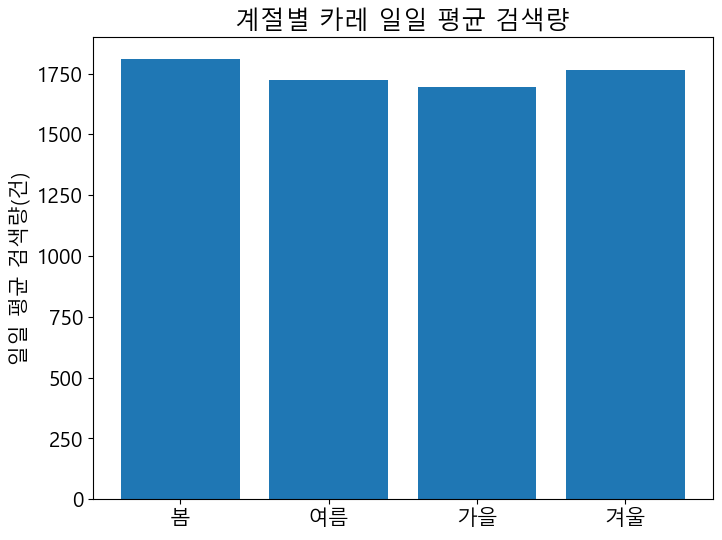

In [43]:
mean_values = new_df.groupby('계절구분')['카레'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 카레 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 장어

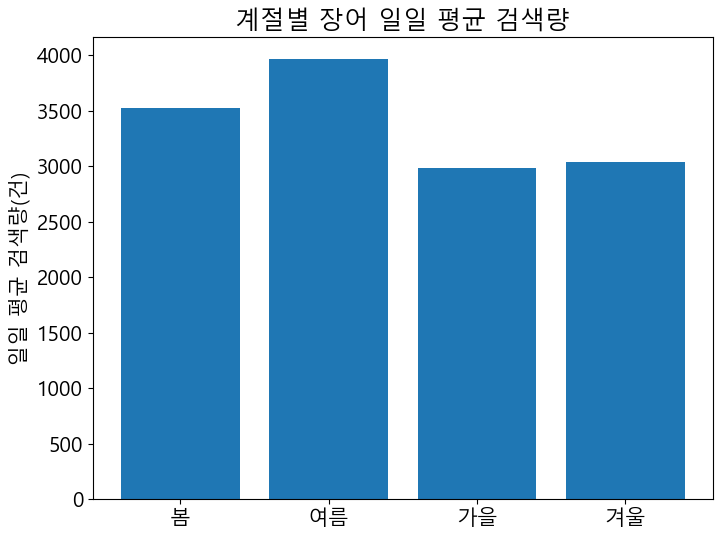

In [44]:
mean_values = new_df.groupby('계절구분')['장어'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 장어 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

### 여름 그래프 합치기 (여름 4위 카레 대신 유의미한 그래프 장어 넣음)

Text(0.5, 1.0, '계절별 장어 일일 평균 검색량')

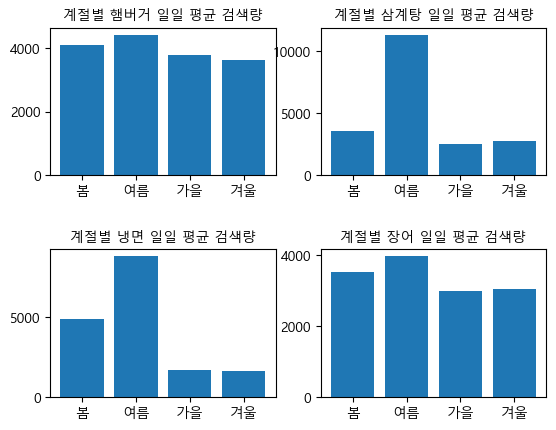

In [31]:
plt.subplots_adjust(hspace = 0.5)

plt.subplot(2,2,1)
mean_values = new_df.groupby('계절구분')['햄버거'].mean()

# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 햄버거 일일 평균 검색량', fontsize=10)

plt.subplot(2,2,2)
mean_values = new_df.groupby('계절구분')['삼계탕'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 삼계탕 일일 평균 검색량', fontsize=10)


plt.subplot(2,2,3)
mean_values = new_df.groupby('계절구분')['냉면'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 냉면 일일 평균 검색량', fontsize=10)


plt.subplot(2,2,4)
mean_values = new_df.groupby('계절구분')['장어'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.title('계절별 장어 일일 평균 검색량', fontsize=10)



### 가을

#### 전라도음식

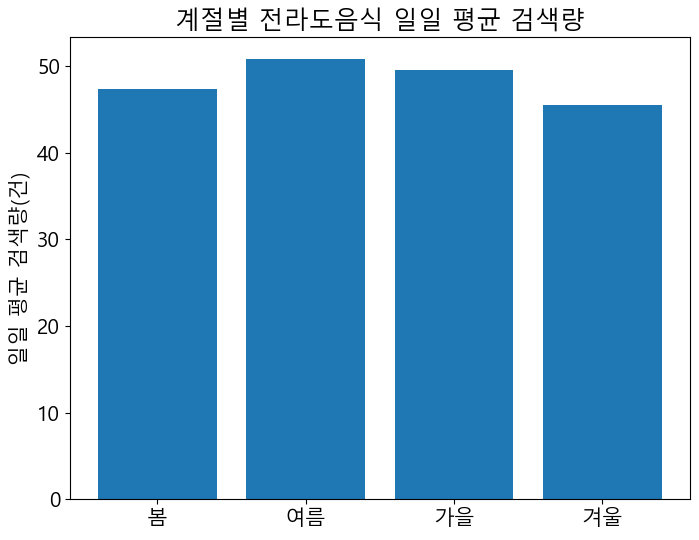

In [32]:
# 전라도음식

mean_values = new_df.groupby('계절구분')['전라도음식'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 전라도음식 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 설렁탕

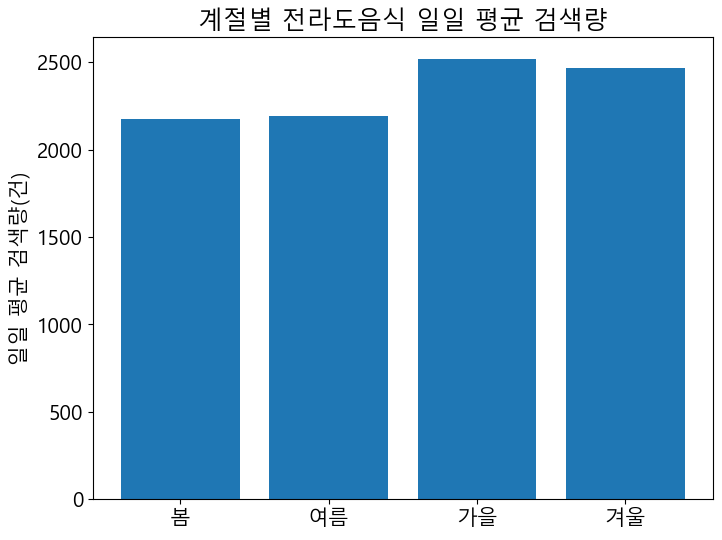

In [33]:
# 설렁탕

mean_values = new_df.groupby('계절구분')['설렁탕'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 전라도음식 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 이슬람음식

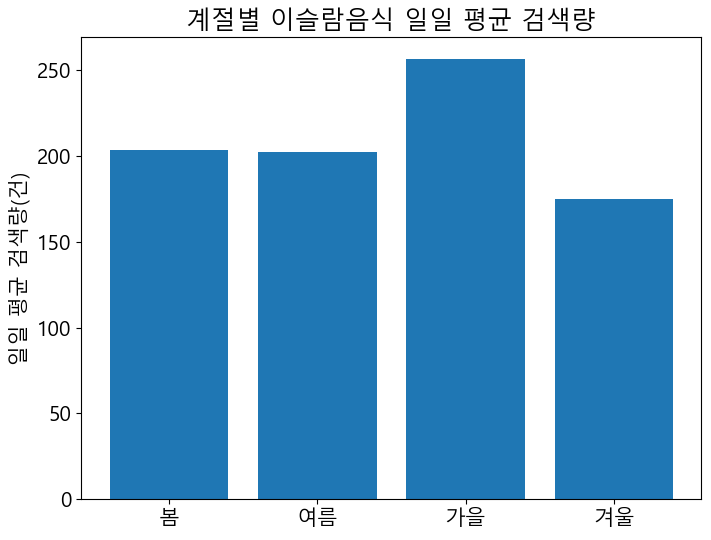

In [34]:
mean_values = new_df.groupby('계절구분')['이슬람'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 이슬람음식 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 동남아음식

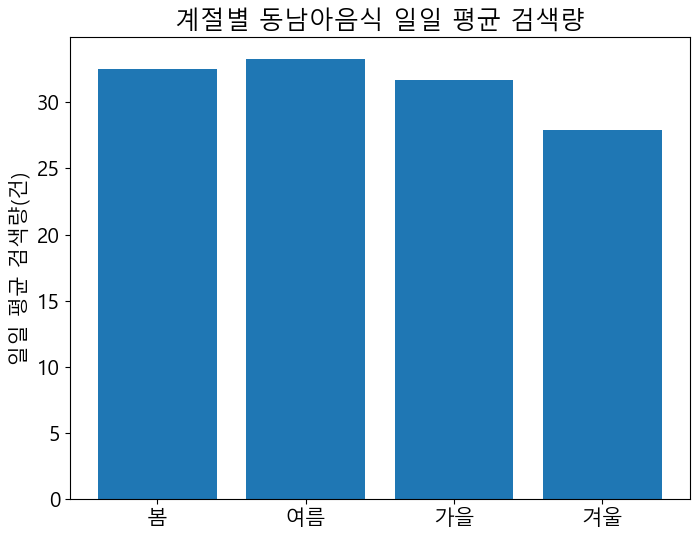

In [35]:
mean_values = new_df.groupby('계절구분')['동남아음식'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 동남아음식 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

### 가을 그래프 합치기

Text(0.5, 1.0, '계절별 동남아음식 일일 평균 검색량')

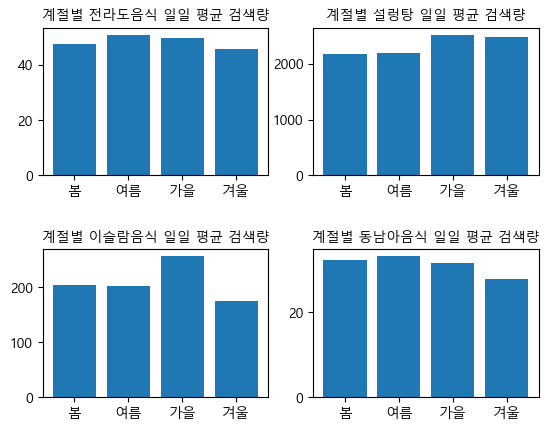

In [36]:
plt.subplots_adjust(hspace = 0.5)

plt.subplot(2,2,1)
mean_values = new_df.groupby('계절구분')['전라도음식'].mean()

# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 전라도음식 일일 평균 검색량', fontsize=10)

plt.subplot(2,2,2)
mean_values = new_df.groupby('계절구분')['설렁탕'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 설렁탕 일일 평균 검색량', fontsize=10)


plt.subplot(2,2,3)
mean_values = new_df.groupby('계절구분')['이슬람'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 이슬람음식 일일 평균 검색량', fontsize=10)


plt.subplot(2,2,4)
mean_values = new_df.groupby('계절구분')['동남아음식'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.title('계절별 동남아음식 일일 평균 검색량', fontsize=10)



### 겨울

#### 회

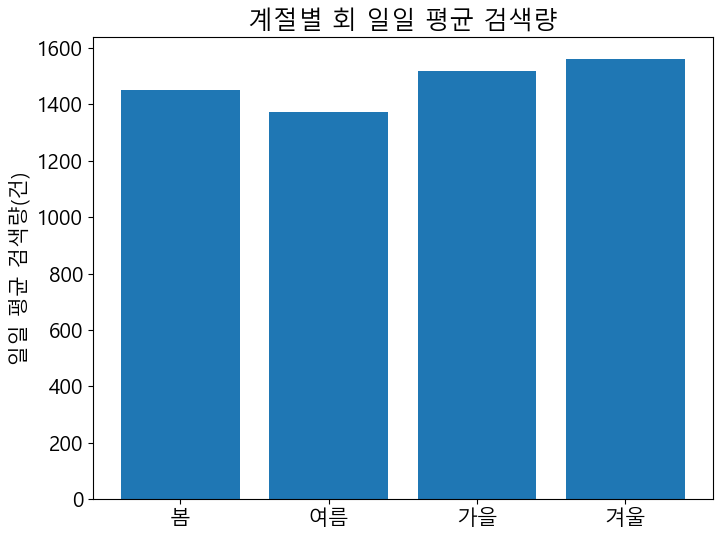

In [37]:
mean_values = new_df.groupby('계절구분')['회'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 회 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 꽃게

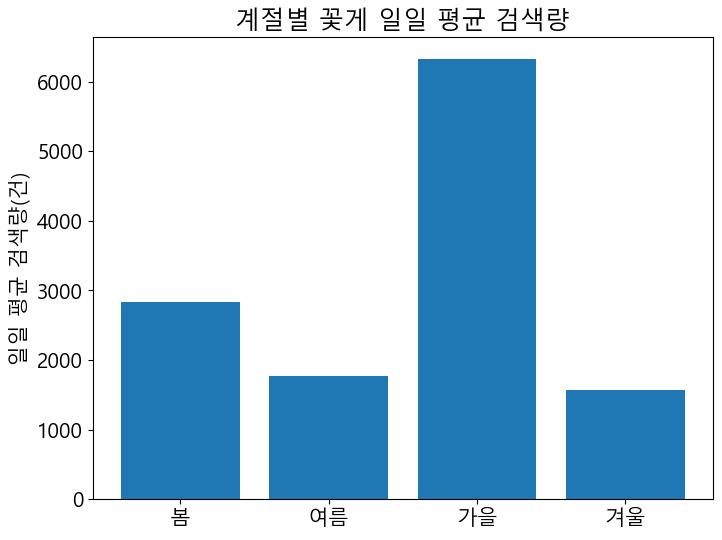

In [38]:
mean_values = new_df.groupby('계절구분')['꽃게'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 꽃게 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 쌀국수

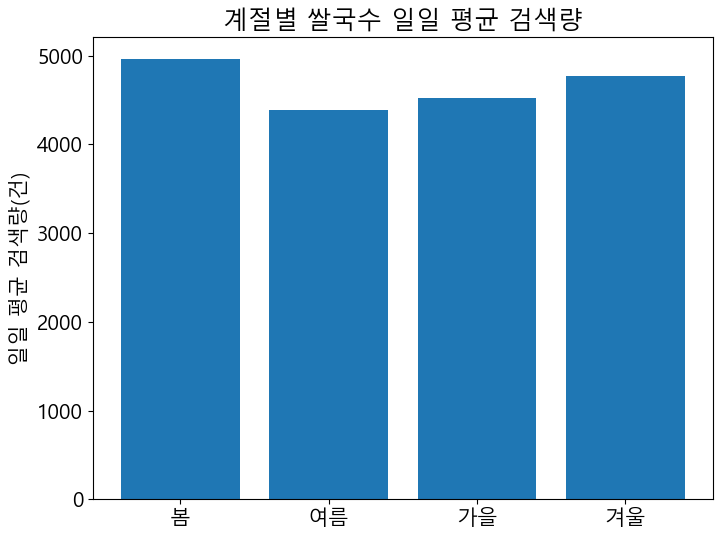

In [39]:
mean_values = new_df.groupby('계절구분')['쌀국수'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 쌀국수 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

#### 스테이크 하우스

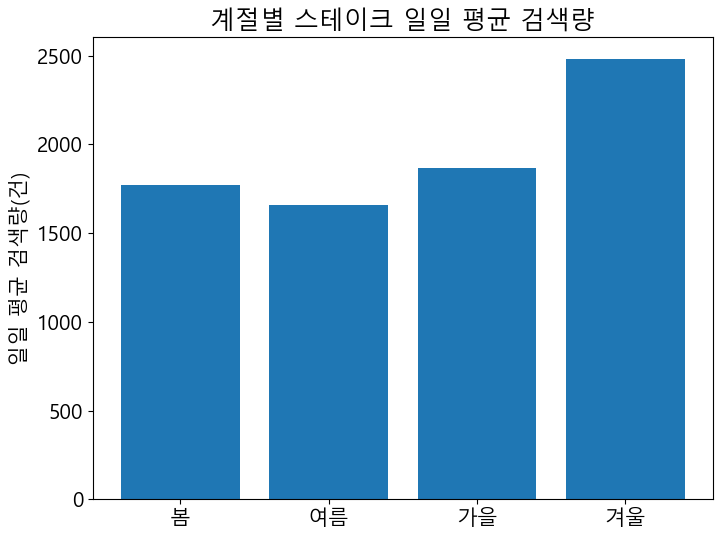

In [40]:
mean_values = new_df.groupby('계절구분')['스테이크'].mean()


# 그래프를 그리기 위한 설정

plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.ylabel('일일 평균 검색량(건)')
plt.title('계절별 스테이크 일일 평균 검색량')

# 그래프를 화면에 표시
plt.show()

### 겨울 그래프 합치기

Text(0.5, 1.0, '계절별 스테이크 일일 평균 검색량')

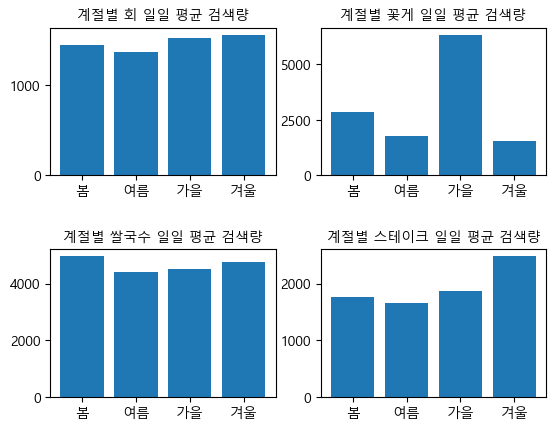

In [41]:
plt.subplots_adjust(hspace = 0.5)

plt.subplot(2,2,1)
mean_values = new_df.groupby('계절구분')['회'].mean()

# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 회 일일 평균 검색량', fontsize=10)

plt.subplot(2,2,2)
mean_values = new_df.groupby('계절구분')['꽃게'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 꽃게 일일 평균 검색량', fontsize=10)


plt.subplot(2,2,3)
mean_values = new_df.groupby('계절구분')['쌀국수'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 쌀국수 일일 평균 검색량', fontsize=10)


plt.subplot(2,2,4)
mean_values = new_df.groupby('계절구분')['스테이크'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.title('계절별 스테이크 일일 평균 검색량', fontsize=10)



### 계절별 가장 뚜렷한 그래프만

Text(0.5, 1.0, '계절별 스테이크 일일 평균 검색량')

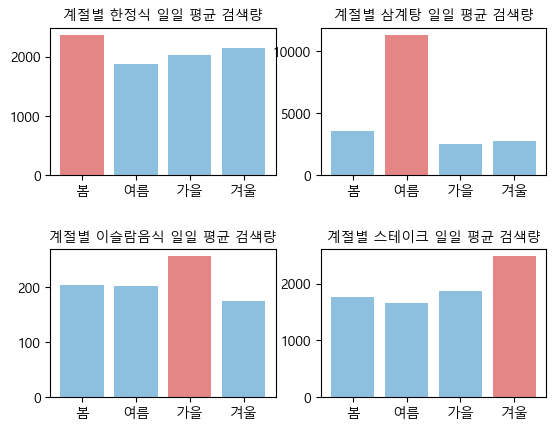

In [42]:
plt.subplots_adjust(hspace = 0.5)

plt.subplot(2,2,1)
mean_values = new_df.groupby('계절구분')['한정식'].mean()

# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8, color = ['#E48586', '#8CC0DE', '#8CC0DE', '#8CC0DE'])
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 한정식 일일 평균 검색량', fontsize=10)

plt.subplot(2,2,2)
mean_values = new_df.groupby('계절구분')['삼계탕'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8, color = ['#8CC0DE', '#E48586', '#8CC0DE', '#8CC0DE'])
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 삼계탕 일일 평균 검색량', fontsize=10)


plt.subplot(2,2,3)
mean_values = new_df.groupby('계절구분')['이슬람'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8, color = ['#8CC0DE', '#8CC0DE', '#E48586', '#8CC0DE'])
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('계절별 이슬람음식 일일 평균 검색량', fontsize=10)


plt.subplot(2,2,4)
mean_values = new_df.groupby('계절구분')['스테이크'].mean()


# 그래프를 그리기 위한 설정

# plt.figure(figsize=(8, 6))
plt.bar(mean_values.index, mean_values.values , width=0.8, color = ['#8CC0DE', '#8CC0DE', '#8CC0DE', '#E48586'])
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.title('계절별 스테이크 일일 평균 검색량', fontsize=10)

